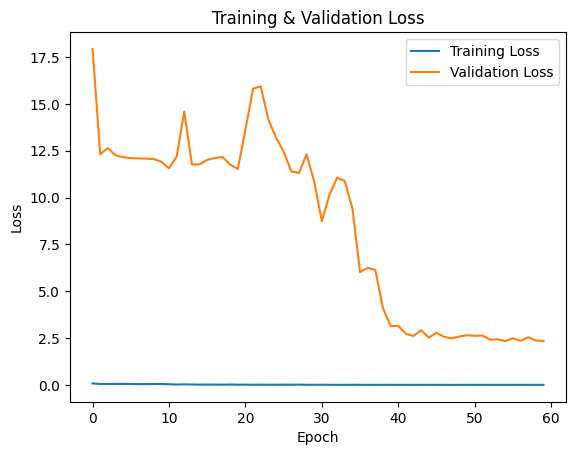

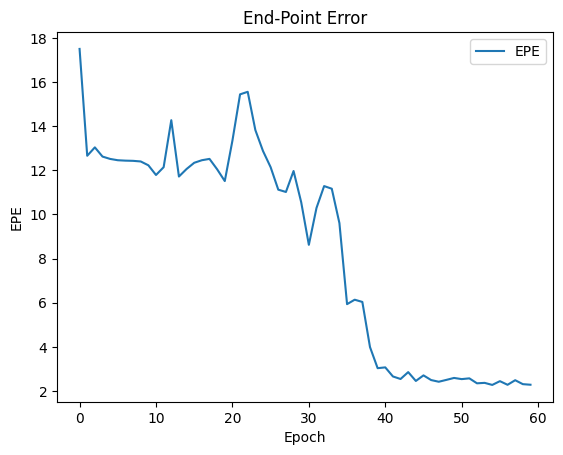

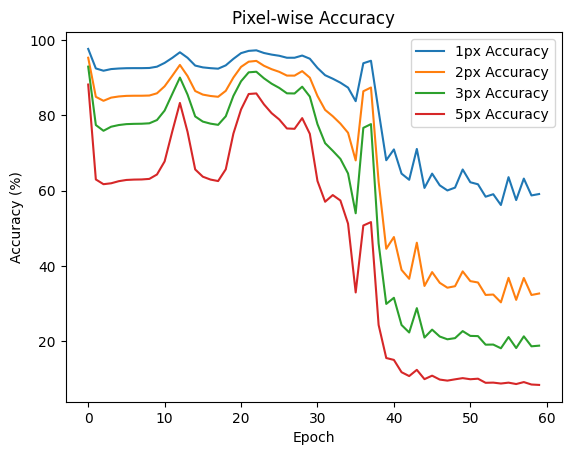

In [1]:
import re
import matplotlib.pyplot as plt

# Initialize
epochs = []
train_losses = []
val_losses = []
epe_list = []
acc_1px = []
acc_2px = []
acc_3px = []
acc_5px = []

with open('/home/cerbere-25/TemporalEventStereo_Official/log.txt', 'r') as f:
    lines = f.readlines()

epoch = -1
for i, line in enumerate(lines):
    if "This is" in line and "-th epoch" in line:
        epoch += 1
        epochs.append(epoch)
    elif "total training loss =" in line:
        match = re.search(r"total training loss = ([\d.]+)", line)
        if match:
            train_losses.append(float(match.group(1)))
    elif "total validation loss =" in line:
        match = re.search(r"total validation loss = ([\d.]+)", line)
        if match:
            val_losses.append(float(match.group(1)))
    elif "'1px': tensor" in line:
        acc_1px.append(float(re.search(r"'1px': tensor\(\[([\d.]+)\]\)", line).group(1)))
        acc_2px.append(float(re.search(r"'2px': tensor\(\[([\d.]+)\]\)", line).group(1)))
        acc_3px.append(float(re.search(r"'3px': tensor\(\[([\d.]+)\]\)", line).group(1)))
        acc_5px.append(float(re.search(r"'5px': tensor\(\[([\d.]+)\]\)", line).group(1)))
        epe_list.append(float(re.search(r"'epe': tensor\(\[([\d.]+)\]\)", line).group(1)))
# Synchroniser les longueurs (prendre la taille minimale parmi toutes les métriques)
min_len = min(len(epochs), len(train_losses), len(val_losses), len(epe_list),
              len(acc_1px), len(acc_2px), len(acc_3px), len(acc_5px))

# Tronquer toutes les listes à la même longueur
epochs = epochs[:min_len]
train_losses = train_losses[:min_len]
val_losses = val_losses[:min_len]
epe_list = epe_list[:min_len]
acc_1px = acc_1px[:min_len]
acc_2px = acc_2px[:min_len]
acc_3px = acc_3px[:min_len]
acc_5px = acc_5px[:min_len]

# Plot training and validation loss
plt.figure()
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot EPE
plt.figure()
plt.plot(epochs, epe_list, label='EPE')
plt.xlabel('Epoch')
plt.ylabel('EPE')
plt.title('End-Point Error')
plt.legend()

# Plot accuracy at different thresholds
plt.figure()
plt.plot(epochs, acc_1px, label='1px Accuracy')
plt.plot(epochs, acc_2px, label='2px Accuracy')
plt.plot(epochs, acc_3px, label='3px Accuracy')
plt.plot(epochs, acc_5px, label='5px Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Pixel-wise Accuracy')
plt.legend()

plt.show()
